In [2]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
all_data_df=pd.read_csv('normalized_by_2000_dtpts.csv')

In [54]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
feature_list = ranked_list[:11]
prediction = ['normalized_solar']

train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)

X_train = np.array(train[feature_list])
y_train = np.array(train[prediction])
X_test = np.array(test[feature_list])
y_test = np.array(test[prediction])

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
b=reg.coef_

In [56]:
b.shape

(1, 11)

In [57]:
a=np.append(np.zeros((1,11)),b, axis=0)
b.shape
a

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.22766123e-02, -4.91204734e-03, -2.60041216e-04,
        -2.82324419e-01,  1.85809725e-04, -1.79991576e-02,
         5.52054181e-04,  2.68309748e-04,  9.01238078e-05,
         2.26596930e-02, -5.64187065e-03]])

TRAIN: [ 5147  5148  5149 ... 51466 51467 51468] TEST: [   0    1    2 ... 5144 5145 5146]
Set 1
R-squared of training data is: 0.579, 0.579
R-squared of testing data is: 0.394, 0.394
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [ 5147  5148  5149 ... 10291 10292 10293]
Set 2
R-squared of training data is: 0.556, 0.556
R-squared of testing data is: 0.610, 0.610
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [10294 10295 10296 ... 15438 15439 15440]
Set 3
R-squared of training data is: 0.572, 0.572
R-squared of testing data is: 0.464, 0.464
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [15441 15442 15443 ... 20585 20586 20587]
Set 4
R-squared of training data is: 0.560, 0.560
R-squared of testing data is: 0.561, 0.561
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [20588 20589 20590 ... 25732 25733 25734]
Set 5
R-squared of training data is: 0.555, 0.555
R-squared of testing data is: 0.618, 0.618
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [

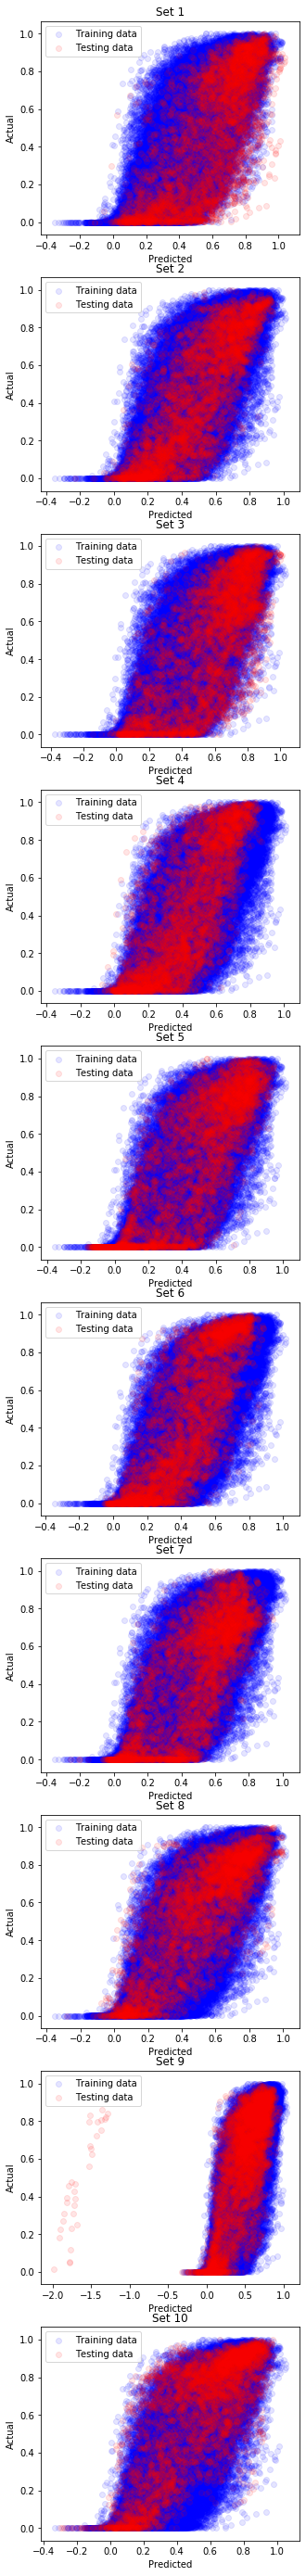

In [86]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
feature_list = ranked_list[:11]
prediction = ['normalized_solar']
X=np.array(all_data_df[feature_list])
y=np.array(all_data_df[prediction])

kf = KFold(n_splits=10,random_state=1,shuffle=False)# Define the split - into 100 folds 

fig, axs = plt.subplots(10, 1, figsize=(5,50))

i=0

reg_array=np.zeros((1,11))

for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, y_train = X[train_index], y[train_index].reshape(-1)
    X_test, y_test = X[test_index], y[test_index].reshape(-1)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    reg_array=np.append(reg_array, (reg.coef_.reshape(1,-1)), axis=0)
    print('Set '+str(i+1))
    print('R-squared of training data is: '+"{:.3f}".format(r2_score(y_train,reg.predict(X_train)))+', '+"{:.3f}".format(reg.score(X_train,y_train)))
    print('R-squared of testing data is: '+"{:.3f}".format(r2_score(y_test,reg.predict(X_test)))+', '+"{:.3f}".format(reg.score(X_test,y_test)))
    axs[i].scatter(reg.predict(X_train), y_train, alpha = 0.1, color='blue')
    axs[i].scatter(reg.predict(X_test), y_test, alpha = 0.1, color='red')
    axs[i].set_title('Set '+str(i+1), fontsize=12)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].legend(('Training data', 'Testing data'))
    i=i+1
reg_array=np.delete(reg_array, (0), axis=0)

In [87]:
reg_array

array([[-1.29042106e-02, -5.01435686e-03, -2.84156035e-04,
        -1.71317245e-01,  1.87618771e-04, -1.94930478e-02,
         4.75347945e-03,  2.72071441e-04,  1.02782430e-04,
         2.42390114e-02, -6.53679541e-03],
       [-1.24627356e-02, -4.98305001e-03, -2.76262619e-04,
        -2.76491569e-01,  2.04873739e-04, -1.89589246e-02,
         2.23940298e-03,  2.73438568e-04,  8.53486264e-05,
         2.38262785e-02, -5.16330803e-03],
       [-1.23662566e-02, -5.19863307e-03, -2.92679801e-04,
        -1.85428175e-01,  2.18530644e-04, -1.85624525e-02,
         6.45976765e-04,  2.87004278e-04,  1.06352400e-04,
         2.37447540e-02, -5.38037175e-03],
       [-1.22114300e-02, -5.04072239e-03, -2.73356756e-04,
        -2.64829239e-01,  1.80389719e-04, -1.79707291e-02,
         1.04057766e-03,  2.62462415e-04,  9.09417123e-05,
         2.24240569e-02, -5.21181901e-03],
       [-1.23825743e-02, -4.95804211e-03, -2.92199931e-04,
        -2.96823691e-01,  2.07175854e-04, -1.84354573e-02,
  

TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   10    28    44 ... 51437 51442 51444]
Set 1
R-squared of training data is: 0.563, 0.563
R-squared of testing data is: 0.553, 0.553
TRAIN: [    0     1     3 ... 51466 51467 51468] TEST: [    2    12    23 ... 51416 51417 51435]
Set 2
R-squared of training data is: 0.561, 0.561
R-squared of testing data is: 0.575, 0.575
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    3     8    11 ... 51436 51449 51465]
Set 3
R-squared of training data is: 0.562, 0.562
R-squared of testing data is: 0.569, 0.569
TRAIN: [    0     1     2 ... 51465 51467 51468] TEST: [   19    21    22 ... 51462 51463 51466]
Set 4
R-squared of training data is: 0.563, 0.563
R-squared of testing data is: 0.552, 0.552
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   26    35    36 ... 51403 51405 51424]
Set 5
R-squared of training data is: 0.562, 0.562
R-squared of testing data is: 0.565, 0.565
TRAIN: [    1     2     3 ... 51466 51467 51468] T

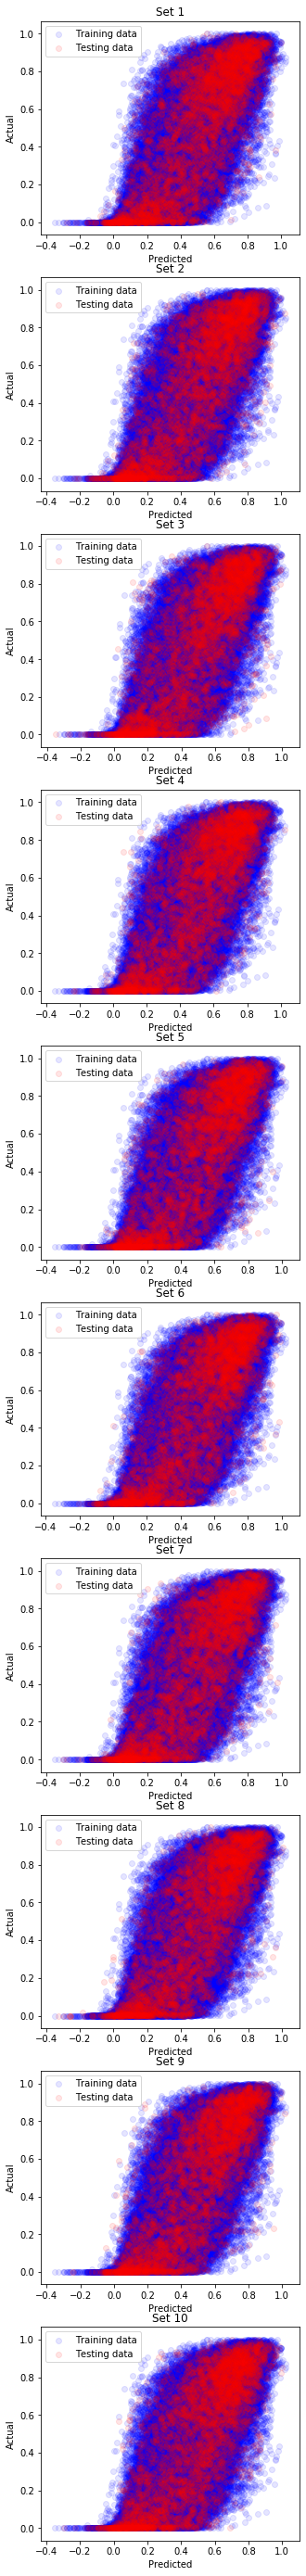

In [88]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
feature_list = ranked_list[:11]
prediction = ['normalized_solar']
X=np.array(all_data_df[feature_list])
y=np.array(all_data_df[prediction])

kf = KFold(n_splits=10,random_state=1,shuffle=True)# Define the split - into 100 folds 

fig, axs = plt.subplots(10, 1, figsize=(5,50))

i=0

reg_array=np.zeros((1,11))

for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, y_train = X[train_index], y[train_index].reshape(-1)
    X_test, y_test = X[test_index], y[test_index].reshape(-1)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    reg_array=np.append(reg_array, (reg.coef_.reshape(1,-1)), axis=0)
    print('Set '+str(i+1))
    print('R-squared of training data is: '+"{:.3f}".format(r2_score(y_train,reg.predict(X_train)))+', '+"{:.3f}".format(reg.score(X_train,y_train)))
    print('R-squared of testing data is: '+"{:.3f}".format(r2_score(y_test,reg.predict(X_test)))+', '+"{:.3f}".format(reg.score(X_test,y_test)))
    axs[i].scatter(reg.predict(X_train), y_train, alpha = 0.1, color='blue')
    axs[i].scatter(reg.predict(X_test), y_test, alpha = 0.1, color='red')
    axs[i].set_title('Set '+str(i+1), fontsize=12)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].legend(('Training data', 'Testing data'))
    i=i+1
reg_array=np.delete(reg_array, (0), axis=0)

In [89]:
reg_array

array([[-1.21522749e-02, -4.95069116e-03, -2.68412184e-04,
        -2.89986165e-01,  1.96896762e-04, -1.74977868e-02,
         1.03299745e-03,  2.72054446e-04,  9.37047416e-05,
         2.20553410e-02, -5.75645844e-03],
       [-1.22280416e-02, -4.95414955e-03, -2.62325190e-04,
        -2.75795276e-01,  1.96374409e-04, -1.77810254e-02,
         8.85645905e-04,  2.67730082e-04,  8.04974510e-05,
         2.24591027e-02, -5.63594129e-03],
       [-1.22814619e-02, -4.98402730e-03, -2.63630516e-04,
        -2.72986277e-01,  1.91111430e-04, -1.79890855e-02,
         1.44115506e-03,  2.66700003e-04,  8.05605838e-05,
         2.25611060e-02, -5.63620648e-03],
       [-1.22066985e-02, -4.93976259e-03, -2.66249614e-04,
        -2.76818080e-01,  1.97375078e-04, -1.76606458e-02,
         1.10850156e-03,  2.71185831e-04,  8.71407132e-05,
         2.23193009e-02, -5.60203661e-03],
       [-1.23554346e-02, -4.91915128e-03, -2.61223461e-04,
        -2.59001041e-01,  1.96298808e-04, -1.83905873e-02,
  